# ***Module Installation***

In [ ]:
%pip install ultralytics
# %pip install ipywidgets
# %pip install opencv-python
# %pip install google-colab


In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# ***Import Statements***

In [2]:
# from google-colab import drive
# drive.mount('/content/drive')
# from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from IPython.display import display, clear_output,HTML
from matplotlib import pyplot as plt
import os
import ipywidgets as widgets
from ipywidgets import IntSlider, HBox, VBox, Button,interact
import threading
import time
from ultralytics import YOLO
# from google.colab.patches import cv2_imshow
from base64 import b64encode
from scipy.spatial import distance as dist
import tkinter as tk
from tkinter import messagebox

# ***Model Training***

In [ ]:
base_path='/content/drive/MyDrive/archive/'
#need to mount drive and add particular path to CSV in file
import pandas as pd
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
column_names = ['index', 'filename', 'class']
# Load Data
data = pd.read_csv(base_path +'ImageMaster', sep='\t', comment='#', header=None, names=column_names)



# Inspect unique values before mapping
print("Unique values before mapping:", data['class'].unique())

# Update the mapping dictionary to reflect the actual classes
mapping_dict = {'heavy': 2, 'medium': 1, 'light': 0}

# Apply the mapping
data['class'] = data['class'].map(mapping_dict)

# Inspect the DataFrame after mapping
print(data)
print("Unique values after mapping:", data['class'].unique())
# Split Data

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
print(train_data.shape)
print(test_data.shape)

Unique values before mapping: ['heavy' 'medium' 'light']
     index                  filename  class
0        0  cctv052x2004080516x01646      2
1        1  cctv052x2004080516x01649      2
2        2  cctv052x2004080517x01652      2
3        3  cctv052x2004080517x01653      2
4        4  cctv052x2004080517x01654      2
..     ...                       ...    ...
249    249  cctv052x2004080619x00103      0
250    250  cctv052x2004080619x00104      0
251    251  cctv052x2004080620x00105      0
252    252  cctv052x2004080620x00106      0
253    253  cctv052x2004080620x00107      0

[254 rows x 3 columns]
Unique values after mapping: [2 1 0]
(203, 3)
(51, 3)


In [ ]:
#error stuff
print("class missing values", train_data['class'].isnull().sum())
print("filename missing values", train_data['filename'].isnull().sum())
print("index missing values", train_data['index'].isnull().sum())


class missing values 0
filename missing values 0
index missing values 0


In [ ]:
# Optionally, fill NaN values with a specific category or drop them

data.dropna(subset=['class'], inplace=True)  # Drop rows with NaN in 'class'

# Check the unique values again
print(data['class'].unique())

[2 1 0]


In [ ]:
print(data.shape)

(254, 3)


In [ ]:
def extract_frames(video_path, num_frames=10):
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = np.linspace(0, total_frames-1, num_frames).astype(int)

    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, (224, 224))
            frames.append(frame)
        else:
            break

    cap.release()
    return np.array(frames)

# Preprocess Training Data
X_train = []
y_train = []

for index, row in train_data.iterrows():

  video_path = os.path.join(base_path+'/video/', row['filename'] + '.avi')
  frames = extract_frames(video_path)
  print(f"Extracted frames shape for {row['filename']}: {frames.shape}")
  if frames.shape == (10, 224, 224, 3):  # Adjust as needed
    X_train.append(frames)
    y_train.append(row['class'])
  else:
    print(f"Warning: Unexpected shape {frames.shape} for {row['filename']}")

X_train = np.array(X_train)
y_train = to_categorical(y_train, num_classes=3)
print("X_train shape:", X_train.shape)
X_test = []
y_test = []

for index, row in test_data.iterrows():

  video_path = os.path.join(base_path+'/video/', row['filename'] + '.avi')
  frames = extract_frames(video_path)
  print(f"Extracted frames shape for {row['filename']}: {frames.shape}")
  if frames.shape == (10, 224, 224, 3):  # Adjust as needed
    X_test.append(frames)
    y_test.append(row['class'])
  else:
    print(f"Warning: Unexpected shape {frames.shape} for {row['filename']}")

X_test = np.array(X_test)
y_test = to_categorical(y_test, num_classes=3)
print("X_test shape:", X_test.shape)

Extracted frames shape for cctv052x2004080617x00067: (10, 224, 224, 3)
Extracted frames shape for cctv052x2004080607x01848: (10, 224, 224, 3)
Extracted frames shape for cctv052x2004080617x00075: (10, 224, 224, 3)
Extracted frames shape for cctv052x2004080517x01665: (10, 224, 224, 3)
Extracted frames shape for cctv052x2004080613x00010: (10, 224, 224, 3)
Extracted frames shape for cctv052x2004080519x01688: (10, 224, 224, 3)
Extracted frames shape for cctv052x2004080607x01844: (10, 224, 224, 3)
Extracted frames shape for cctv052x2004080606x01832: (10, 224, 224, 3)
Extracted frames shape for cctv052x2004080518x01671: (10, 224, 224, 3)
Extracted frames shape for cctv052x2004080519x01685: (10, 224, 224, 3)
Extracted frames shape for cctv052x2004080610x01878: (10, 224, 224, 3)
Extracted frames shape for cctv052x2004080619x00101: (10, 224, 224, 3)
Extracted frames shape for cctv052x2004080606x01831: (10, 224, 224, 3)
Extracted frames shape for cctv052x2004080613x00015: (10, 224, 224, 3)
Extrac

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, TimeDistributed, Dropout

# # Build the Model
# model = Sequential()

# # TimeDistributed wrapper to apply the CNN to each frame individually
# model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=(10, 224, 224, 3)))
# model.add(TimeDistributed(MaxPooling2D((2, 2))))
# model.add(TimeDistributed(Flatten()))

# # LSTM to handle the temporal aspect
# model.add(LSTM(64, return_sequences=False))
# model.add(Dropout(0.5))

# # Output Layer
# model.add(Dense(3, activation='softmax'))

# # Compile the Model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Summary of the Model
# model.summary()

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout

# # Build the Model
# model = Sequential()

# # 3D Convolutional Layers
# model.add(Conv3D(32, (3, 3, 3), activation='relu', input_shape=(10, 224, 224, 3)))
# model.add(MaxPooling3D(pool_size=(1, 2, 2)))
# model.add(Conv3D(64, (3, 3, 3), activation='relu'))
# model.add(MaxPooling3D(pool_size=(1, 2, 2)))
# model.add(Flatten())

# # Fully Connected Layers
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(3, activation='softmax'))

# # Compile the Model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Summary of the Model
# model.summary()
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50

# Build the Model
model = Sequential()

# Use ResNet50 as the feature extractor (pre-trained on ImageNet)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model to prevent retraining
for layer in base_model.layers:
    layer.trainable = False

# Add the base model wrapped in TimeDistributed
model.add(TimeDistributed(base_model, input_shape=(10, 224, 224, 3)))

# Add pooling and flattening
model.add(TimeDistributed(GlobalAveragePooling2D()))

# Add LSTM to capture temporal dependencies
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))

# Add fully connected output layer with softmax activation
model.add(Dense(3, activation='softmax'))

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the Model
model.summary()


94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 10, 7, 7, 2048)    23587712  
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 10, 2048)          0         
 stributed)                                                      
                                                                 
 lstm (LSTM)                 (None, 64)                540928    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                         

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.2)

Epoch 1/10
15/15 [==============================] - 31s 2s/step - loss: 0.6941 - accuracy: 0.7083 - val_loss: 0.4161 - val_accuracy: 0.7667
Epoch 2/10
15/15 [==============================] - 25s 2s/step - loss: 0.3905 - accuracy: 0.8167 - val_loss: 0.3039 - val_accuracy: 0.8333
Epoch 3/10
15/15 [==============================] - 24s 2s/step - loss: 0.3105 - accuracy: 0.8333 - val_loss: 0.2764 - val_accuracy: 0.8333
Epoch 4/10
15/15 [==============================] - 25s 2s/step - loss: 0.2723 - accuracy: 0.8750 - val_loss: 0.2557 - val_accuracy: 0.8667
Epoch 5/10
15/15 [==============================] - 25s 2s/step - loss: 0.2332 - accuracy: 0.9250 - val_loss: 0.2600 - val_accuracy: 0.8667
Epoch 6/10
15/15 [==============================] - 25s 2s/step - loss: 0.2244 - accuracy: 0.9083 - val_loss: 0.2574 - val_accuracy: 0.8333
Epoch 7/10
15/15 [==============================] - 25s 2s/step - loss: 0.1858 - accuracy: 0.9333 - val_loss: 0.2405 - val_accuracy: 0.9000
Epoch 8/10
15/15 [==

In [ ]:
print(X_test.shape)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

model.save(base_path+'models/traffic_density_model_latest.keras')

(45, 10, 224, 224, 3)
2/2 [==============================] - 7s 2s/step - loss: 0.1232 - accuracy: 0.9556
Test Accuracy: 0.96


2/2 [==============================] - 9s 2s/step


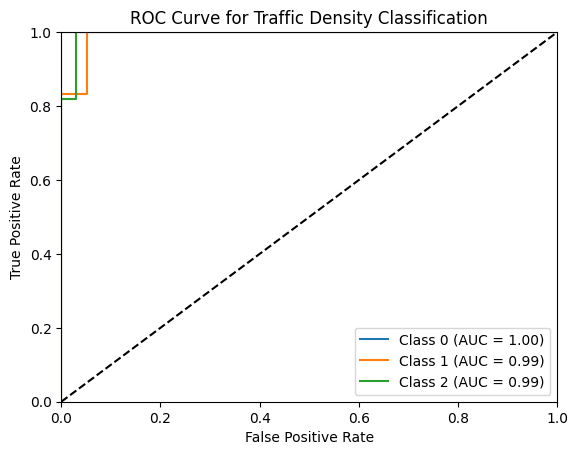

Accuracy: 0.96


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from tensorflow.keras.utils import to_categorical

y_pred_probs = model.predict(X_test)
y_test_classes = np.argmax(y_test, axis=1)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):  # Since there are 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_pred_probs[:, i])
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Traffic Density Classification')
plt.legend(loc='lower right')
plt.show()

# Calculate and print the accuracy
y_pred_classes = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')

# ***Class Declarations***

In [3]:
class TrafficSignal:
    def __init__(self, signal_id, adjacent_signals, light="red", state="not ready"):
        self.signal_id = signal_id
        self.adjacent_signals = adjacent_signals
        self.light = light
        self.state = state

    def turn_green(self):
        self.light = "green"
        print(f"Traffic signal {self.signal_id} turned green for ambulance passage.")

    def set_state_ready(self):
        self.state = "ready"

    def __repr__(self):
        return f"Signal {self.signal_id}: Light={self.light}, State={self.state}"



In [4]:
class Camera:
    def __init__(self, camera_id, signal):
        self.camera_id = camera_id
        self.signal = signal

    def detect_ambulance(self):
        print(f"Ambulance detected by camera {self.camera_id} at Signal {self.signal.signal_id}.")
        self.signal.turn_green()
        update_adjacent_signals(self.signal.adjacent_signals)

def update_adjacent_signals(adjacent_signals_ids):
    for signal_id in adjacent_signals_ids:
        adjacent_signal = traffic_signals.get(signal_id)
        if adjacent_signal:
            adjacent_signal.set_state_ready()
            print(f"Traffic signal {signal_id} state set to ready.")



In [5]:
# Circular Linked List for Traffic Density
class TrafficNode:
    def __init__(self, density):
        self.density = density
        self.next = None

class TrafficMonitor:
    def __init__(self, max_size=30):
        self.max_size = max_size
        self.size = 0
        self.head = None
        self.tail = None
        self.consecutive_high_count = 0  # Tracks consecutive 'High' entries

    def add_density(self, density):
        new_node = TrafficNode(density)

        if self.size < self.max_size:
            # Initially filling the list
            if not self.head:
                self.head = new_node
                self.tail = new_node
                self.tail.next = self.head
            else:
                self.tail.next = new_node
                self.tail = new_node
                self.tail.next = self.head
            self.size += 1
        else:
            # Overwriting the oldest entry
            if density == 'High':
                self.consecutive_high_count += 1
            else:
                self.consecutive_high_count = 0  # Reset on any non-High entry

            self.head.density = density
            self.head = self.head.next
            self.tail = self.tail.next

        # Reset consecutive count if density breaks or reset
        if density == 'High' and self.consecutive_high_count < self.max_size:
            self.consecutive_high_count += 1
        else:
            self.consecutive_high_count = 0

    def is_high_traffic(self):
        return self.consecutive_high_count >= self.max_size


# ***Initialising Variables***

In [6]:

coords={}
extracted_regions = {}
traffic_signals = {
    1: TrafficSignal(1, [2, 3]),
    2: TrafficSignal(2, [1, 4]),
    3: TrafficSignal(3, [1, 5]),
    4: TrafficSignal(4, [2, 6]),
    5: TrafficSignal(5, [3]),
    6: TrafficSignal(6, [4]),
}

# Initialize cameras
cameras = {
    1: Camera(1, traffic_signals[1]),
    2: Camera(2, traffic_signals[2]),
    3: Camera(3, traffic_signals[3]),
    4: Camera(4, traffic_signals[4]),
    5: Camera(5, traffic_signals[5]),
    6: Camera(6, traffic_signals[6]),
}
lower_silver = np.array([0, 0, 200])  # Low saturation and high value
upper_silver = np.array([180, 50, 255])  # High value

In [7]:
#Global variables for setup func below
global cap, first_frame, frame_height, frame_width, frozen_frame
global selected_x, selected_y, x_slider, y_slider
global apply_button, back_button, done_button, slider_box
global running, marked_frame, rgb_frame, initial_marked_frame
global l



# ***Miscellaneous Functions***

In [8]:
#Ambulance has been detected(Randomly for testing purposes)
import random
def random_detect():
  ran = random.randint(1, 6)
  if ran==3:
    return True
  else:
    return False
  # cam_num = random.randint(1, 6) #6 shows max number of cams. we have hard coded as of now


In [9]:
def pad_to_match(img, target_height, target_width):
    # Calculate padding sizes
    top = (target_height - img.shape[0]) // 2
    bottom = target_height - img.shape[0] - top
    left = (target_width - img.shape[1]) // 2
    right = target_width - img.shape[1] - left
    # Add borders
    return cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])


# ***FUNCTIONS FOR SETUP***

In [10]:
def frame_name():
  #coordinates in the required format to split screen
  regions = []
  if coords['x_coords'][1]==0:
    coords['x_coords'].pop(0)
  if coords['y_coords'][1]==0:
    coords['y_coords'].pop(0)
  for i in range(len(coords['x_coords']) - 1):
      for j in range(len(coords['y_coords']) - 1):
          x1, x2 = coords['x_coords'][i], coords['x_coords'][i + 1]
          y1, y2 = coords['y_coords'][j], coords['y_coords'][j + 1]
          regions.append((x1, y1, x2, y2))

  # Display the list of regions
  print("Regions in (x1, y1, x2, y2) format:", regions)
  return regions

# ***SLIDERS(SETUP)***

In [11]:
def setup(video_path):
  cap = cv2.VideoCapture(video_path)

  # Set up frame dimensions and capture the first frame
  ret, first_frame = cap.read()
  if not ret:
    print("Failed to load video.")
    cap.release()
  else:
    # Flip the frame for a selfie view if needed (optional)
    # first_frame = cv2.flip(first_frame, 1)

    # Get frame dimensions
    global frame_height, frame_width
    frame_height, frame_width = first_frame.shape[:2]

    # Global variable to keep track of the frozen frame (the first frame)
    global frozen_frame
    frozen_frame = first_frame.copy()
    global selected_x,selected_y,x_slider,y_slider
    # Variables to store the last selected x and y coordinates
    selected_x = frame_width // 2
    selected_y = frame_height // 2
    # Create sliders for x and y coordinates

    x_slider = IntSlider(min=0, max=frame_width-1, step=1, value=frame_width//2, description="X")
    y_slider = IntSlider(min=0, max=frame_height-1, step=1, value=frame_height//2, description="Y")
    # Create buttons for Apply, Back, and Done
    apply_button = Button(description="Apply")
    back_button = Button(description="Back")
    done_button = Button(description="Done")

    # Link button actions


    # Display widgets
    global slider_box
    slider_box = VBox([x_slider, y_slider, HBox([apply_button, back_button, done_button])])
    global running
    # Set a flag to control the while loop
    running = True
    def select_point(x, y):
      # Copy the frozen frame (first frame) for drawing
      marked_frame = frozen_frame.copy()

      # Draw horizontal and vertical lines intersecting at (x, y)
      cv2.line(marked_frame, (x, 0), (x, frame_height), (0, 255, 0), 1)  # Vertical line
      cv2.line(marked_frame, (0, y), (frame_width, y), (0, 255, 0), 1)  # Horizontal line

      return marked_frame

  # Function to display the frame using matplotlib
    def display_frame(frame):
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_frame)
        plt.axis('off')
        plt.show()

    # Button functions
    def apply_changes(_):
        """Save the current x and y coordinates as selected values and update display."""
        global selected_x, selected_y
        # Update the selected coordinates
        selected_x = x_slider.value
        selected_y = y_slider.value

        # Display the updated frame with crosshair
        marked_frame = select_point(selected_x, selected_y)
        clear_output(wait=True)
        display_ui(marked_frame)
        print(f"Coordinates saved: X={selected_x}, Y={selected_y}")

    def reset_sliders(_):
        """Reset sliders to their initial positions."""
        x_slider.value = frame_width // 2
        y_slider.value = frame_height // 2
        marked_frame = select_point(x_slider.value, y_slider.value)
        clear_output(wait=True)
        display_ui(marked_frame)

    def finish(_):
        """Release the video, clear display, and show final coords dictionary."""
        global running
        running = False


        selected_x = x_slider.value
        selected_y = y_slider.value
        # Create coords dictionary with fixed and selected coordinates
        global coords
        if selected_x==0:
          coords['x_coords']= [0, frame_width]
        else:
          coords['x_coords']= [0, selected_x, frame_width]
        if selected_y==0:
          coords['y_coords']= [0, frame_height]
        else:
          coords['y_coords']= [0, selected_y, frame_height]

        print("Video display stopped.")
        print("Final Coordinates:", coords)
        frame_name()
        cap.release()
        clear_output()


    def display_ui(marked_frame):
        """Display the UI with the image and sliders."""
        display_frame(marked_frame)  # Show the current frame with crosshair
        display(slider_box)  # Show the sliders
        # Continuous update loop in a separate thread
    def update_loop():
        # while running:
        #     marked_frame = select_point(x_slider.value, y_slider.value)  # Update the frame with the current crosshair
        #     clear_output(wait=True)
        #     display_ui(marked_frame)  # Display the updated frame and sliders
        #     time.sleep(1)  # Adjust the sleep time to control the update rate
        pass

    apply_button.on_click(apply_changes)
    back_button.on_click(reset_sliders)
    done_button.on_click(finish)


    # Start the update loop in a separate thread
    threading.Thread(target=update_loop, daemon=True).start()

    # Initial display
    initial_marked_frame = select_point(x_slider.value, y_slider.value)
    display_ui(initial_marked_frame)
    # frame_name()

# ***DRIVER FUNCTIONS***

In [12]:
# Main vehicle tracker update function
min_distance_threshold = 80

def update_vehicle_tracker1(detections, vehicle_tracker, next_vehicle_id, disappeared, max_disappeared):
    current_centroids = []


    for result in detections:

        for box in result.boxes:

            class_id = int(box.cls[0].item())

            if class_id == CAR_CLASS_IDX:

                x_center, y_center, _, _ = box.xywh[0].cpu().numpy()

                centroid = (int(x_center), int(y_center))

                current_centroids.append(centroid)


    if len(current_centroids) == 0:

        for vehicle_id in list(vehicle_tracker.keys()):

            disappeared[vehicle_id] += 1

            if disappeared[vehicle_id] > max_disappeared:

                del vehicle_tracker[vehicle_id]
                del disappeared[vehicle_id]

        return vehicle_tracker, next_vehicle_id


    if len(vehicle_tracker) == 0:

        for centroid in current_centroids:

            vehicle_tracker[next_vehicle_id] = centroid

            disappeared[next_vehicle_id] = 0

            next_vehicle_id += 1

        return vehicle_tracker, next_vehicle_id


    vehicle_ids = list(vehicle_tracker.keys())

    vehicle_centroids = list(vehicle_tracker.values())

    D = dist.cdist(np.array(vehicle_centroids), np.array(current_centroids))

    rows = D.min(axis=1).argsort()

    cols = D.argmin(axis=1)[rows]


    used_rows = set()
    used_cols = set()


    for (row, col) in zip(rows, cols):

        if row in used_rows or col in used_cols:
            continue

        if D[row, col] < min_distance_threshold:

            vehicle_id = vehicle_ids[row]

            vehicle_tracker[vehicle_id] = current_centroids[col]

            disappeared[vehicle_id] = 0

            used_rows.add(row)

            used_cols.add(col)


    unused_rows = set(range(0, D.shape[0])).difference(used_rows)

    unused_cols = set(range(0, D.shape[1])).difference(used_cols)


    for row in unused_rows:

        vehicle_id = vehicle_ids[row]

        disappeared[vehicle_id] += 1

        if disappeared[vehicle_id] > max_disappeared:

            del vehicle_tracker[vehicle_id]
            del disappeared[vehicle_id]


    for col in unused_cols:

        if all(D[row, col] > min_distance_threshold for row in range(D.shape[0])):

            vehicle_tracker[next_vehicle_id] = current_centroids[col]

            disappeared[next_vehicle_id] = 0

            next_vehicle_id += 1


    return vehicle_tracker, next_vehicle_id

In [13]:
# Main vehicle tracker update function
def update_vehicle_tracker(detections, vehicle_tracker, next_vehicle_id, disappeared, max_disappeared,frame1):
    current_centroids = []

    for result in detections:
        for box in result.boxes:
            class_id = int(box.cls[0].item())
            if class_id == CAR_CLASS_IDX:
                x_center, y_center, w, h = box.xywh[0].cpu().numpy()
                x_center, y_center, width, height = int(x_center), int(y_center), int(w), int(h)

                # Calculate the coordinates of the bounding box
                x1 = max(0, x_center - width // 2)
                y1 = max(0, y_center - height // 2)
                x2 = min(frame1.shape[1], x_center + width // 2)
                y2 = min(frame1.shape[0], y_center + height // 2)

                # Extract the bounding box from the image
                car_roi = frame1[y1:y2, x1:x2]

                # Convert to HSV color space
                hsv_roi = cv2.cvtColor(car_roi, cv2.COLOR_BGR2HSV)

                # Create masks for red color
                silver_mask = cv2.inRange(hsv_roi, lower_silver, upper_silver)

                # Calculate the proportion of silver pixels
                total_pixels = car_roi.shape[0] * car_roi.shape[1]
                silver_pixels = cv2.countNonZero(silver_mask)
                silver_proportion = silver_pixels / total_pixels if total_pixels > 0 else 0
                print(silver_proportion)
                # Check if the proportion of silver pixels exceeds the threshold
                is_silver = silver_proportion > 0.01

                centroid = (int(x_center), int(y_center))
                current_centroids.append(centroid)
                if is_silver:
                  cameras[1].detect_ambulance()
                  leng, wid, h=frame1.shape
                  cv2.putText(frame1, f'EMERGENCY!!!',
                              (0, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    if len(current_centroids) == 0:
        for vehicle_id in list(vehicle_tracker.keys()):
            disappeared[vehicle_id] += 1
            if disappeared[vehicle_id] > max_disappeared:
                del vehicle_tracker[vehicle_id]
                del disappeared[vehicle_id]
        return vehicle_tracker, next_vehicle_id

    if len(vehicle_tracker) == 0:
        for centroid in current_centroids:
            vehicle_tracker[next_vehicle_id] = centroid
            disappeared[next_vehicle_id] = 0
            next_vehicle_id += 1
        return vehicle_tracker, next_vehicle_id

    vehicle_ids = list(vehicle_tracker.keys())
    vehicle_centroids = list(vehicle_tracker.values())
    D = dist.cdist(np.array(vehicle_centroids), np.array(current_centroids))
    rows = D.min(axis=1).argsort()
    cols = D.argmin(axis=1)[rows]

    used_rows = set()
    used_cols = set()

    for (row, col) in zip(rows, cols):
        if row in used_rows or col in used_cols:
            continue
        if D[row, col] < min_distance_threshold:
            vehicle_id = vehicle_ids[row]
            vehicle_tracker[vehicle_id] = current_centroids[col]
            disappeared[vehicle_id] = 0
            used_rows.add(row)
            used_cols.add(col)

    unused_rows = set(range(0, D.shape[0])).difference(used_rows)
    unused_cols = set(range(0, D.shape[1])).difference(used_cols)

    for row in unused_rows:
        vehicle_id = vehicle_ids[row]
        disappeared[vehicle_id] += 1
        if disappeared[vehicle_id] > max_disappeared:
            del vehicle_tracker[vehicle_id]
            del disappeared[vehicle_id]

    for col in unused_cols:
        if all(D[row, col] > min_distance_threshold for row in range(D.shape[0])):
            vehicle_tracker[next_vehicle_id] = current_centroids[col]
            disappeared[next_vehicle_id] = 0
            next_vehicle_id += 1

    return vehicle_tracker, next_vehicle_id

# ***CENTROID***
(old)


In [ ]:
#split screen with centroid

import cv2
import os
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from IPython.display import HTML
from base64 import b64encode
from scipy.spatial import distance as dist

In [ ]:
# Load YOLOv8 model
model = YOLO('yolov8n.pt')
class_names = model.names
CAR_CLASS_IDX = next(key for key, value in class_names.items() if value == 'car')

video_path = os.path.join(base_path, "vid11.mp4")
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter("processed_output.mp4", fourcc, cap.get(cv2.CAP_PROP_FPS), (int(cap.get(3)), int(cap.get(4))))


In [ ]:

total_car_count_left = 0
total_car_count_right = 0

# Tracker variables for both halves
vehicle_tracker_left = {}
vehicle_tracker_right = {}
next_vehicle_id_left = 0
next_vehicle_id_right = 0
disappeared_left = {}
disappeared_right = {}
max_disappeared = 50
min_distance_threshold = 50

In [ ]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    height, width, _ = frame.shape
    middle = width // 2
    left_half = frame[:, :middle]
    right_half = frame[:, middle:]
    gap = np.zeros((height, 10, 3), dtype=np.uint8)

    results_left = model(left_half)
    results_right = model(right_half)

    vehicle_tracker_left, next_vehicle_id_left = update_vehicle_tracker(
        results_left, vehicle_tracker_left, next_vehicle_id_left, disappeared_left, max_disappeared)
    vehicle_tracker_right, next_vehicle_id_right = update_vehicle_tracker(
        results_right, vehicle_tracker_right, next_vehicle_id_right, disappeared_right, max_disappeared)

    for vehicle_id, centroid in vehicle_tracker_left.items():
        cv2.circle(left_half, centroid, 5, (0, 255, 0), -1)
        cv2.putText(left_half, f"Car ID {vehicle_id}", (centroid[0] - 10, centroid[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    for vehicle_id, centroid in vehicle_tracker_right.items():
        cv2.circle(right_half, centroid, 5, (0, 0, 255), -1)
        cv2.putText(right_half, f"Car ID {vehicle_id}", (centroid[0] - 10, centroid[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    car_count_left = len(vehicle_tracker_left)
    car_count_right = len(vehicle_tracker_right)

    total_car_count_left += car_count_left
    total_car_count_right += car_count_right

    cv2.putText(left_half, f'Left Cars: {car_count_left}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(right_half, f'Right Cars: {car_count_right}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Traffic density logic
    traffic_density_left = 'High' if car_count_left > 4 else 'Medium' if car_count_left >= 3 else 'Low'
    traffic_density_right = 'High' if car_count_right > 4 else 'Medium' if car_count_right >= 3 else 'Low'
    cv2.putText(left_half, f'Traffic: {traffic_density_left}', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(right_half, f'Traffic: {traffic_density_right}', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    combined_frame = np.hstack((left_half, gap, right_half))
    cv2.line(frame, (middle, 0), (middle, height), (255, 0, 0), 2)
    cv2_imshow(combined_frame)
    out.write(combined_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Total cars detected in the left side: {total_car_count_left}")
print(f"Total cars detected in the right side: {total_car_count_right}")

def display_video(video_path):
    video_file = open(video_path, "rb").read()
    video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
    return HTML(f"""<video width=400 controls><source src="{video_url}" type="video/mp4"></video>""")

display_video("processed_output.mp4")

# ***MONITORING TRAFFIC***
(old)


In [ ]:
# Load YOLOv8 model
model = YOLO('yolov8n.pt')
class_names = model.names
CAR_CLASS_IDX = next(key for key, value in class_names.items() if value == 'car')
video_path = os.path.join(base_path, "vid11.mp4")


In [ ]:
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter("processed_output.mp4", fourcc, cap.get(cv2.CAP_PROP_FPS), (int(cap.get(3)), int(cap.get(4))))


In [ ]:
total_car_count_left = 0
total_car_count_right = 0

# Tracker variables for both halves
vehicle_tracker_left = {}
vehicle_tracker_right = {}
next_vehicle_id_left = 0
next_vehicle_id_right = 0
disappeared_left = {}
disappeared_right = {}
max_disappeared = 50
min_distance_threshold = 50


In [ ]:
# Initialize Traffic Monitors for each half
traffic_monitor_left = TrafficMonitor()
traffic_monitor_right = TrafficMonitor()

In [ ]:
# Process video frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    height, width, _ = frame.shape
    middle = width // 2
    gap = np.zeros((height, 10, 3), dtype=np.uint8)

    results_left = model(left_half)
    results_right = model(right_half)

    vehicle_tracker_left, next_vehicle_id_left = update_vehicle_tracker(
        results_left, vehicle_tracker_left, next_vehicle_id_left, disappeared_left, max_disappeared)
    vehicle_tracker_right, next_vehicle_id_right = update_vehicle_tracker(
        results_right, vehicle_tracker_right, next_vehicle_id_right, disappeared_right, max_disappeared)
    for vehicle_id, centroid in vehicle_tracker_left.items():
        cv2.circle(left_half, centroid, 5, (0, 255, 0), -1)
        cv2.putText(left_half, f"Car ID {vehicle_id}", (centroid[0] - 10, centroid[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    for vehicle_id, centroid in vehicle_tracker_right.items():
        cv2.circle(right_half, centroid, 5, (0, 0, 255), -1)
        cv2.putText(right_half, f"Car ID {vehicle_id}", (centroid[0] - 10, centroid[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    car_count_left = len(vehicle_tracker_left)
    car_count_right = len(vehicle_tracker_right)

    # Traffic density logic
    traffic_density_left = 'High' if car_count_left > 4 else 'Medium' if car_count_left >= 3 else 'Low'
    traffic_density_right = 'High' if car_count_right > 4 else 'Medium' if car_count_right >= 3 else 'Low'

    traffic_monitor_left.add_density(traffic_density_left)
    traffic_monitor_right.add_density(traffic_density_right)

    # Check if high traffic persists
    if traffic_monitor_left.is_high_traffic():
        cv2.putText(left_half, 'R: Consistent High Traffic', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    if traffic_monitor_right.is_high_traffic():
        cv2.putText(right_half, 'L: Consistent High Traffic', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    combined_frame = np.hstack((left_half, gap, right_half))
    cv2_imshow(combined_frame)
    out.write(combined_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
#OLD CODE

traffic_signals = {
    1 :{"adjacent_signals": [2, 3], "light": "red", "state": "not ready"},
    2 :{"adjacent_signals": [1, 4], "light": "red", "state": "not ready"},
    3 :{"adjacent_signals": [1, 5], "light": "red", "state": "not ready"},
    4 :{"adjacent_signals": [2, 6], "light": "red", "state": "not ready"},
    5 :{"adjacent_signals": [3], "light": "red", "state": "not ready"},
    6 :{"adjacent_signals": [4], "light": "red", "state": "not ready"},
}

# Dictionary of cameras associated with each signal using new IDs
cameras = {
    1 : { "sig": 1},
    2 : { "sig": 2},
    3 : { "sig": 3},
    4 : { "sig": 4},
    5 : { "sig": 5},
    6 : { "sig": 6},
}

# Function to simulate ambulance detection and green light signal change
def ambulance_detected(camera_id):
    signal_id=cameras[camera_id]["sig"]
    # Find the signal where the ambulance is detected
    signal = traffic_signals[signal_id]

    if not signal:
        print(f"Traffic signal {signal_id} not found.")
        return

    # Get associated camera info
    # camera_info = cameras.get(signal_id, None)

    print(f"Ambulance detected by camera {camera_id} at Signal {signal_id}.")

    # Turn the light green for the detected signal
    signal["light"] = "green"
    print(f"Traffic signal {signal_id} turned green for ambulance passage.")

    # Set state of adjacent signals to "ready"
    update_adjacent_states(signal["adjacent_signals"])

# Function to update the state of adjacent signals
def update_adjacent_states(adjacent_ids):
    for adj_id in adjacent_ids:
        adj_signal = next((sig for sig in traffic_signals if sig["id"] == adj_id), None)
        if adj_signal:
            adj_signal["state"] = "ready"

# Simulate ambulance detection at a signal
ambulance_detected("T1")

# Print final state of all traffic signals and camera information
print("\nFinal state of traffic signals:")
for signal in traffic_signals:
    print(signal)

print("\nCamera information:")
for signal_id, camera in cameras.items():
    print(f"Signal {signal_id}: {camera}")


In [ ]:
#set this as global.
# Initialize traffic signals
traffic_signals = {
    1: TrafficSignal(1, [2, 3]),
    2: TrafficSignal(2, [1, 4]),
    3: TrafficSignal(3, [1, 5]),
    4: TrafficSignal(4, [2, 6]),
    5: TrafficSignal(5, [3]),
    6: TrafficSignal(6, [4]),
}

# Initialize cameras
cameras = {
    1: Camera(1, traffic_signals[1]),
    2: Camera(2, traffic_signals[2]),
    3: Camera(3, traffic_signals[3]),
    4: Camera(4, traffic_signals[4]),
    5: Camera(5, traffic_signals[5]),
    6: Camera(6, traffic_signals[6]),
}

# Simulate ambulance detection
cameras[1].detect_ambulance()

# Print final state of all traffic signals
print("\nFinal state of traffic signals:")
for signal in traffic_signals.values():
    print(signal)


# ***NEWEST***

In [ ]:
# video_path = os.path.join(base_path, "vid11.mp4")
video_path = r"C:\Users\kanko\Downloads\vid11.mp4"
setup(video_path)

In [15]:
regions=frame_name()
l=len(regions)
print(l)

Regions in (x1, y1, x2, y2) format: [(0, 0, 426, 143), (0, 143, 426, 480), (426, 0, 852, 143), (426, 143, 852, 480)]
4


In [16]:
# Load YOLOv8 model
model = YOLO('yolov8n.pt')
class_names = model.names
CAR_CLASS_IDX = next(key for key, value in class_names.items() if value == 'car')


4


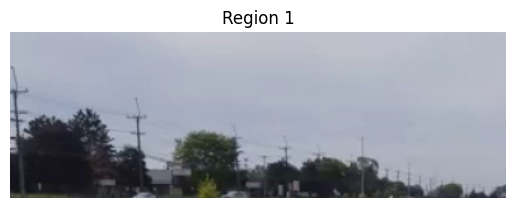

Region 1 is marked as not active and will be removed from the list.


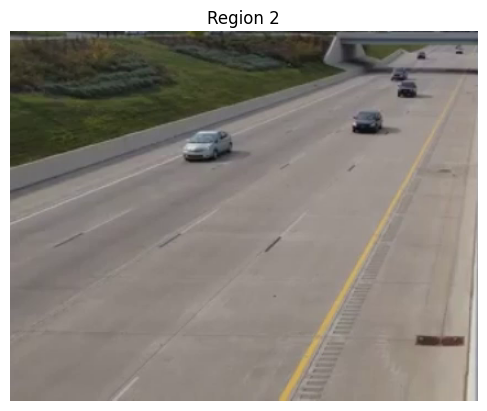

Region 2 is marked as active.


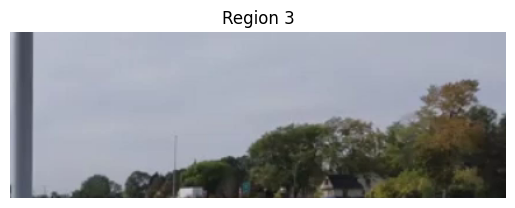

Region 3 is marked as not active and will be removed from the list.


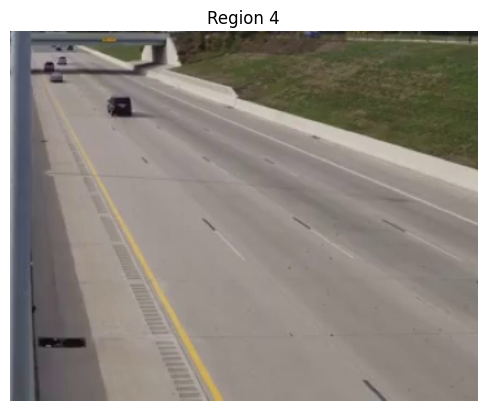

Region 4 is marked as active.

0: 512x640 4 cars, 135.1ms
Speed: 4.2ms preprocess, 135.1ms inference, 10.0ms postprocess per image at shape (1, 3, 512, 640)
337 426 3
0.03814935064935065
Ambulance detected by camera 1 at Signal 1.
Traffic signal 1 turned green for ambulance passage.
Traffic signal 2 state set to ready.
Traffic signal 3 state set to ready.
0.0
0.0
0.0

0: 512x640 2 cars, 88.1ms
Speed: 2.0ms preprocess, 88.1ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 640)
337 426 3
0.0
0.0

0: 512x640 4 cars, 65.5ms
Speed: 1.0ms preprocess, 65.5ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)
337 426 3
0.022222222222222223
Ambulance detected by camera 1 at Signal 1.
Traffic signal 1 turned green for ambulance passage.
Traffic signal 2 state set to ready.
Traffic signal 3 state set to ready.
0.0
0.0
0.0

0: 512x640 1 car, 70.5ms
Speed: 1.0ms preprocess, 70.5ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)
337 426 3
0.0

0: 512x640 4

In [17]:

# Tracker variables for all regions
trackers = []
veh_id = []
disappear = []
for i in range(0, l):
  trackers.append(dict())
  veh_id.append(0)
  disappear.append(dict())
max_disappeared = 50

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

monitors=[]
for a in range(0,l):
  monitors.append(TrafficMonitor())
print(len(monitors))
active=[]
flag=True
cam_id=1
flag3=0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # print(l)
    extracted_regions1 = [frame[y1:y2, x1:x2] for (x1, y1, x2, y2) in regions]
    extracted_regions=[]
    if flag:
      for index, region in enumerate(extracted_regions1):
        # Convert BGR to RGB for correct color representation in matplotlib
        region_rgb = cv2.cvtColor(region, cv2.COLOR_BGR2RGB)

        plt.imshow(region_rgb)
        plt.title(f"Region {index + 1}")
        plt.axis('off')  # Hide axes
        plt.show()

        # Prompt user for input
        while True:
            key = input(f"Is Region {index + 1} active? (a: active, n: not active): ").strip().lower()
            if key == 'a':
                active.append(index)
                print(f"Region {index + 1} is marked as active.")
                break
            elif key == 'n':
                print(f"Region {index + 1} is marked as not active and will be removed from the list.")

                break
            else:
                print("Invalid input. Please enter 'a' for active or 'n' for not active.")

        l=len(active)
        if l%2==1 and l!=1:
          print("Odd number of divisions except for a single frame are not allowed")
        flag=False
    for i in active:
      extracted_regions.append(extracted_regions1[i])




    # gap = np.zeros((height, 10, 3), dtype=np.uint8)
    results=[]
    counts=[]
    dense=[]
    for a in range(0,l):
      results.append(model(extracted_regions[a]))
      leng,wid,h=extracted_regions[a].shape
      print(leng, wid, h)
      trackers[a], veh_id[a] = update_vehicle_tracker(results[a], trackers[a], veh_id[a], disappear[a], max_disappeared, extracted_regions[a])
      for vehicle_id, centroid in trackers[a].items():
        cv2.circle(extracted_regions[a],centroid, 5, (0, 255, 0), -1)
        cv2.putText(extracted_regions[a], f"Car ID {vehicle_id}", (centroid[0] - 10, centroid[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
      counts.append(len(trackers[a]))
      dense.append('High' if counts[a] > 4 else 'Medium' if counts[a] >= 3 else 'Low')
      
      cv2.putText(extracted_regions[a], f'Count:  {counts[a]}',
                  (20, leng-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
      cv2.putText(extracted_regions[a], f'Frame: {a+1}',
                  (wid-150, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)
      
      
      if counts[a] > 4:
        cv2.putText(extracted_regions[a], f'{a+1}: High',
                    (wid-170, leng-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
      elif counts[a] >= 3:
        cv2.putText(extracted_regions[a], f'{a+1}: Medium',
                    (wid-170, leng-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
      else:
        cv2.putText(extracted_regions[a], f'{a+1}: Low',
                    (wid-170, leng-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
  
      monitors[a].add_density(dense[a])
      if monitors[a].is_high_traffic():
        cv2.putText(extracted_regions[a], f'{a+1}: Consistent High Traffic', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        flag3=1
      

    # car_count_left = len(vehicle_tracker_left)
    # car_count_right = len(vehicle_tracker_right)

    # # Traffic density logic
    # traffic_density_left = 'High' if car_count_left > 4 else 'Medium' if car_count_left >= 3 else 'Low'
    # traffic_density_right = 'High' if car_count_right > 4 else 'Medium' if car_count_right >= 3 else 'Low'

    # traffic_monitor_left.add_density(traffic_density_left)
    # traffic_monitor_right.add_density(traffic_density_right)

    # # Check if high traffic persists
    # if traffic_monitor_left.is_high_traffic():
    #     cv2.putText(left_half, 'R: Consistent High Traffic', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    # if traffic_monitor_right.is_high_traffic():
    #     cv2.putText(right_half, 'L: Consistent High Traffic', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    if l == 2:
        # If there are only 2 frames, place them side-by-side
        try:
          combined_frame = np.hstack((extracted_regions[0], extracted_regions[1]))
        except:
          combined_frame = np.vstack((extracted_regions[0], extracted_regions[1]))
    elif l == 4:
        h,w=extracted_regions[2].shape
        hgap,vgap=100
        max_height,max_height1 = max(extracted_regions[0].shape[0], extracted_regions[1].shape[0]),max(extracted_regions[2].shape[0], extracted_regions[3].shape[0])
        max_width,max_width1 = max(extracted_regions[0].shape[1], extracted_regions[1].shape[1]),max(extracted_regions[2].shape[1], extracted_regions[3].shape[1])
        for i in (0,1):
          pad_to_match(extracted_regions[i],max_height,max_width)
        for j in (2,3):
          pad_to_match(extracted_regions[i],max_height1,max_width1)
        height, width, _ = extracted_regions[0].shape
        hga1 = np.zeros((height, hgap, 3), dtype=np.uint8)  # Horizontal gap
        vga1 = np.zeros((vgap, width + w + hgap, 3), dtype=np.uint8)  # Vertical gap
        # If there are 4 frames, create a 2x2 grid
        top_row = np.hstack((extracted_regions[0],hga1, extracted_regions[1]))
        bottom_row = np.hstack((extracted_regions[2],hga1, extracted_regions[3]))
        combined_frame = np.vstack((top_row,vga1, bottom_row))
    elif l==1:
      combined_frame = extracted_regions[0]
    else:
        print("Number of frames should be 1, 2 or 4; unable to arrange.")
    cv2.imshow(r'Combined Frame',combined_frame)
    # if flag3:
    #   time.sleep(1)
    # out.write(combined_frame)
    # if random_detect():
    #    cameras[cam_id].detect_ambulance()
    #    cv2.putText(combined_frame, 'Ambulance Detected!!', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break



cap.release()
# out.release()
cv2.destroyAllWindows()

# ***Ambulance detection model***


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2  # OpenCV used for image processing
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
import tensorflow_hub as hub
import keras.utils as image
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

# Mount Google Drive to access datasets
# from google.colab import drive
# drive.mount('/content/drive')
# base_path2=base_path

# # Set directories for the dataset
# train_dir = base_path2+"/Emergency_Vehicles/train"  # Change this to your actual path
# test_dir = base_path2+"/Emergency_Vehicles/test"  # Change this to your actual path

# # Load an image for processing
# image = cv2.imread(base_path2+"/Emergency_Vehicles/train/1.jpg")  # Change this to your actual path
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting to RGB

# # Display the image
# plt.imshow(image)
# plt.axis('off')  # Turn off axis numbers and ticks
# plt.show()


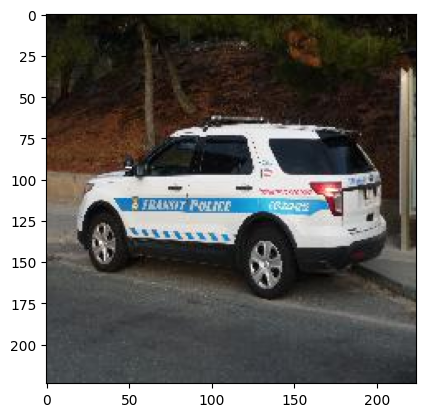

In [ ]:
plt.imshow(image)

In [ ]:
image.shape

(224, 224, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Keras image data generator is used for the generation

In [ ]:
# Here we are applying our desired transformations
image_gen = ImageDataGenerator(
            rotation_range=20,# specifies the rotation to be 20%
            width_shift_range=0.1, # specifies the width shift of 10%
            height_shift_range=0.1,# specifies the height shift of 10%
            shear_range=0.20, # crops part of the image
            zoom_range=0.20, # #zooms the image by 20%
            fill_mode='nearest', # fills using the nearest pixel
            horizontal_flip=True, # Secifies the horizontal flip
            rescale=1/255 # scales the image
)


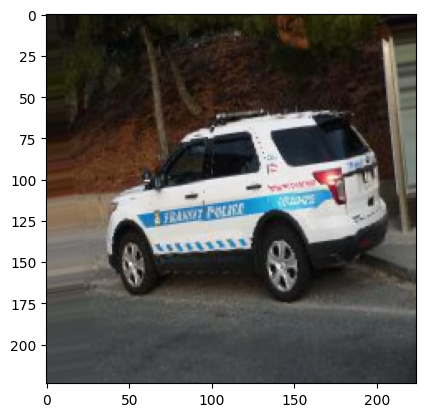

In [ ]:
# showing the transformation
plt.imshow(image_gen.random_transform(image))

In [ ]:
train_df = pd.read_csv(base_path2+"/Emergency_Vehicles/train.csv")
test_df = pd.read_csv(base_path2+"/Emergency_Vehicles/test.csv")


In [ ]:
train_df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [ ]:
if 'emergency_or_not' in train_df.columns:
    train_df['emergency_or_not'] = train_df['emergency_or_not'].astype(str)

if 'emergency_or_not' in test_df.columns:
    test_df['emergency_or_not'] = test_df['emergency_or_not'].astype(str)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [ ]:
train_generator=image_gen.flow_from_dataframe(dataframe=train_df[:1150], # specify the dataset used for trainin
 directory=train_dir, # specify the path to the directory
 x_col='image_names', # specify the names of the images
 y_col='emergency_or_not', # specifies the class labels
 class_mode='binary', # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the im
 batch_size=50# defines the batch size
 )
validation_generator=image_gen.flow_from_dataframe(dataframe=train_df[1150:], # specify the dataset used for tr
 directory=train_dir, # specify the path to the directory
 x_col='image_names', # specify the names of the images
 y_col='emergency_or_not', # specifies the class labels
 class_mode='binary', # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the im
 batch_size=50 # defines the batch size
 )


Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='valid'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 110, 110, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 53, 53, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │       1,081,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,101,221 (4.20 MB)

 Trainable params: 1,101,157 (4.20 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
history=model.fit(train_generator,epochs = 30,validation_data = validation_generator)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 6/23 ━━━━━━━━━━━━━━━━━━━━ 8:04 28s/step - accuracy: 0.5296 - loss: 1.0480

In [ ]:
## checking for overfitting
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (10,3))
plt.plot(history_df['loss'],
 label='training_loss')
plt.plot(history_df['val_loss'],
 label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

In [ ]:
test_df.index

In [ ]:
test_dir_image = []
for i in tqdm(test_df.index):
    img_path = '/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/' + test_df['image_names'][i]  # Adjust the path to match the directory structure
    img = Image.open(img_path).convert('RGB')  # Load image using PIL
    img = img.resize((224, 224))  # Resize image
    img = np.array(img)  # Convert image to NumPy array
#     img = img / 255.0  # Normalize pixel values
    test_dir_image.append(img)

test = np.array(test_dir_image)


In [ ]:
pred = model.predict(test)


In [ ]:
num_ = np.floor(pred)

In [ ]:
# Load the sample submission file
submission = pd.read_csv("/content/drive/MyDrive/path_to_your_dataset/Emergency_Vehicles/sample_submission.csv")  # Change this to your actual path

# Assuming 'num_' is a variable holding your predictions
submission['emergency_or_not'] = num_  # Update the 'emergency_or_not' column with your predictions

# Display the first few rows of the submission DataFrame
print(submission.head())


In [ ]:
submission.to_csv('submission29.csv', index = False)

In [ ]:
submission.head(5)

In [3]:

%pip install tensorflow==2.12.0rc0

  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl.metadata (2.3 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)
  Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl.metadata (11 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl.metadata (7.5 kB)
   ---------------------------------------- 0.0/272.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/272.9 MB 17.1 MB/s eta 0:00:16
   ---------------------------------------- 1.0/272.9 MB 17.1 MB/s eta 0:00:16

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\kanko\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [ ]:
#save model
from tensorflow.keras.models import load_model
# model.save('vehicle.keras')
model_vechile = load_model(('vehicle.h5'),custom_objects={'KerasLayer':hub.KerasLayer})